# Loading data

## Google Colab

To run the notebook You have to:

1.   Add the folder TP1 (or parent AP) to Your drive (right click > add shorcut to my drive)
2.   Mount the google drive
3.   Navigate to the folder using `%cd path/to/folder`
4.   Data is expected to be in folder `dataset/` with structure:

    *   `data.npz`
    *   `labels.csv`
    *   `pokemon_types.txt`
    
Note: If structure will be different or `dataset/` will not be in the same directory as this file (`main.ipynb`) You will have to change the paths. 

To verify You can use `!ls`, `!pwd` or You can try accessing a file on the drive (e.g. importing a function from a file). 

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Copy this cell and change path to Yours 
%cd /content/drive/MyDrive/AP/TP1

!ls

/content/drive/.shortcut-targets-by-id/1PHYG04I0Rq1HPcXLG6rnTDHoHEepF_XK/AP/TP1
dataset     model_CNN1.png  __pycache__     tp1.py		  tp1_utils.py
logs	    model_MLP1.png  ReportAP1.gdoc  tp1_sample_masks.png
main.ipynb  model_MLP2.png  TP1		    tp1_sample.png


In [6]:
# Copy this cell and change path to Yours 
%cd /content/drive/MyDrive/AP/TP1

!ls

/content/drive/MyDrive/AP/TP1
dataset  main.ipynb	 model_MLP2.png  TP1		       tp1_sample.png
logs	 model_CNN1.png  __pycache__	 tp1.py		       tp1_utils.py
logsMLP  model_MLP1.png  ReportAP1.gdoc  tp1_sample_masks.png


In [7]:
# run this to check everything is ok
from tp1_utils import load_data,images_to_pic,compare_masks,overlay_masks
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout
from keras import layers, models, backend
from keras import regularizers
from keras.optimizers import Adam, Adagrad, Adadelta
import matplotlib.pyplot as plt
import numpy as np


assert callable(load_data) == True

In [8]:
ds = load_data()
for k, v in ds.items():
  print(k, v.shape)
images_to_pic('tp1_sample.png',ds['train_X'][:100])
images_to_pic('tp1_sample_masks.png',ds['train_masks'][:100])



train_X (4000, 64, 64, 3)
test_X (500, 64, 64, 3)
train_masks (4000, 64, 64, 1)
test_masks (500, 64, 64, 1)
train_classes (4000, 10)
train_labels (4000, 10)
test_classes (500, 10)
test_labels (500, 10)


**Image Visualisation**

<ipython-input-43-4e50f006975d>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  cifar_img = plt.subplot(4,5, i+1)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


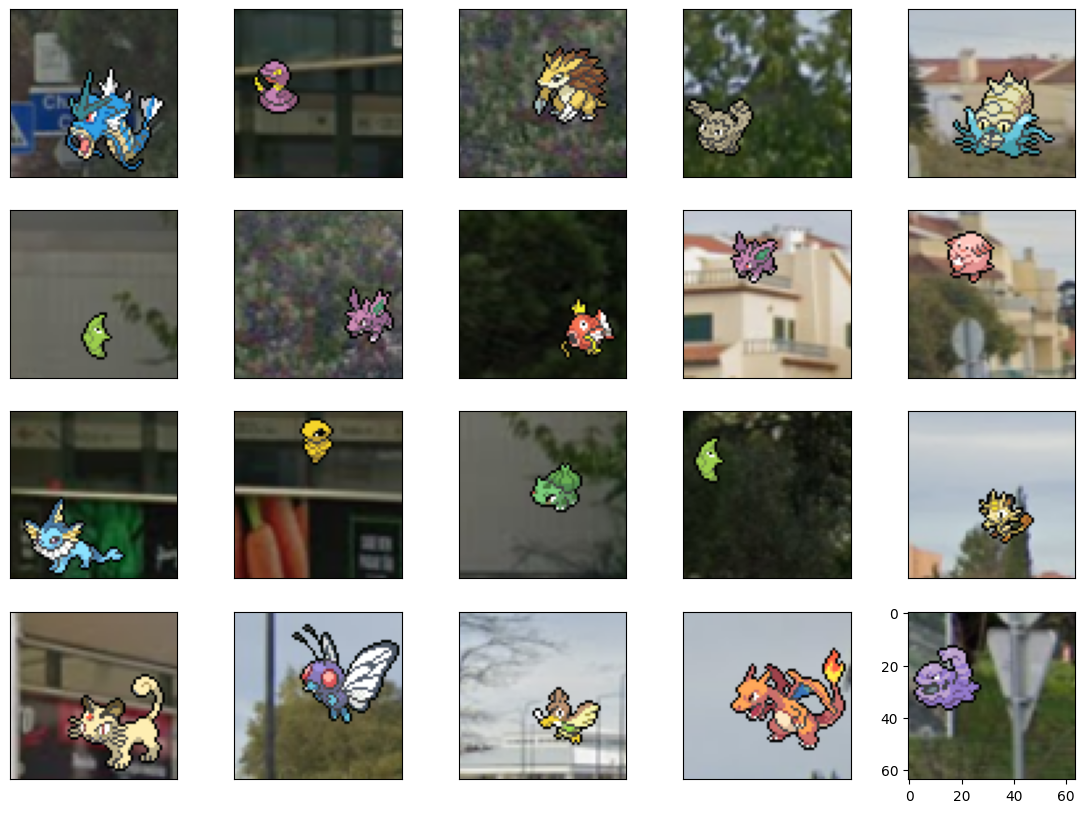

In [ ]:
#Image Visualisation
import matplotlib.pyplot as plt
import numpy as np

train_X_vis=ds['train_X']

plt.figure(figsize=(14, 10))
for i in range (20):
  rand_num = np.random.randint(0, train_X_vis.shape[0])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  cifar_img = plt.subplot(4,5, i+1)
  plt.imshow(train_X_vis[rand_num])

print(ds['train_classes'][5])
print("\n")
print(ds['train_labels'][8])

In [ ]:
def training_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

def plot_history_new(history):
    """
    Plots the training and validation accuracy and loss over epochs for a given model history.
    
    Args:
        history (keras.callbacks.History): The history object returned by model.fit().
    """
    # Get the accuracy and loss from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    # Create the figure and two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
    
    # Plot the accuracy on the first subplot
    ax1.plot(epochs, acc, 'bo', label='Training accuracy')
    ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax1.set_title('Training and validation accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # Plot the loss on the second subplot
    ax2.plot(epochs, loss, 'bo', label='Training loss')
    ax2.plot(epochs, val_loss, 'b', label='Validation loss')
    ax2.set_title('Training and validation loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    # Display the plot
    plt.show()

**MLP cell**

In [ ]:
#MLP cell

#Validation split 3500/500 with classes(one-hot encoding) 
#train_images,train_classes , train_classes, valid_classes = train_test_split( ds['train_X'], ds['train_classes'], test_size=0.125, random_state=420)
#train_images[5]
#train_classes[5]
backend.clear_session()

model_mlp = models.Sequential()
model_mlp.add(layers.Flatten(input_shape=(64, 64, 3)))

model_mlp.add(layers.Dense(32, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model_mlp.add(layers.BatchNormalization())
model_mlp.add(layers.Dropout(0.21))

model_mlp.add(layers.Dense(64, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model_mlp.add(layers.BatchNormalization())
model_mlp.add(layers.Dropout(0.21))

model_mlp.add(layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.07)))
model_mlp.add(layers.Dense(10))

#Caterogical crossentropy for classes
model_mlp.compile(optimizer=Adam(learning_rate=0.005),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

#model_MLP.compile(optimizer=Adam(lr=0.06),loss='kullback_leibler_divergence',metrics=['accuracy'])
#loss='kullback_leibler_divergence'
#SparseCE for labels 
#model_MLP.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

early_stop=tf.keras.callbacks.EarlyStopping( monitor="val_accuracy",patience=10,verbose=1,mode="max",restore_best_weights=True)
redude_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.2,patience=4,verbose=1,mode="max",min_lr=0.0001)
tenfor_board=tf.keras.callbacks.TensorBoard(log_dir="./logsMLP",histogram_freq=1,write_graph=True,write_images=True,write_steps_per_second=False)
#,callbacks=[EarlyStop,ReduceLR,TensorBoard]
#Validation split 3500/500 with classes(one-hot encoding) 
history_mlp = model_mlp.fit(ds['train_X'], ds['train_classes'], validation_split=0.125, epochs=40,batch_size=16,callbacks=[early_stop,redude_lr,tenfor_board])
#model_MLP.summary()
#training_plot(history_MLP)

Epoch 1/40
219/219 [==============================] - 3s 11ms/step - loss: 2.7235 - accuracy: 0.1580 - val_loss: 2.2099 - val_accuracy: 0.1880 - lr: 0.0050
Epoch 2/40
219/219 [==============================] - 2s 11ms/step - loss: 2.2038 - accuracy: 0.1683 - val_loss: 2.1732 - val_accuracy: 0.1780 - lr: 0.0050
Epoch 3/40
219/219 [==============================] - 2s 7ms/step - loss: 2.1764 - accuracy: 0.1811 - val_loss: 2.1523 - val_accuracy: 0.1880 - lr: 0.0050
Epoch 4/40
219/219 [==============================] - 2s 8ms/step - loss: 2.1632 - accuracy: 0.1780 - val_loss: 2.1532 - val_accuracy: 0.1880 - lr: 0.0050
Epoch 5/40
216/219 [============================>.] - ETA: 0s - loss: 2.1589 - accuracy: 0.1788
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
219/219 [==============================] - 2s 7ms/step - loss: 2.1590 - accuracy: 0.1783 - val_loss: 2.1433 - val_accuracy: 0.1880 - lr: 0.0050
Epoch 6/40
219/219 [==============================] - 2s 7ms/s

16/16 [==============================] - 0s 3ms/step - loss: 2.0106 - accuracy: 0.2800
Test accuracy: 0.2800000011920929


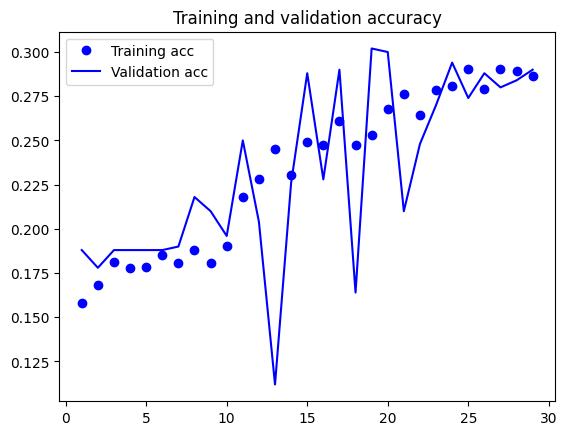

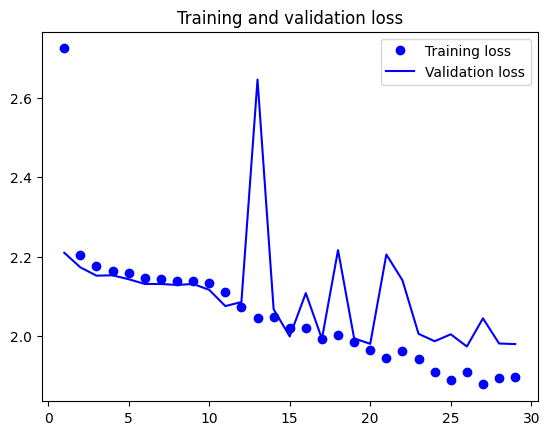

In [ ]:
loss, accuracy = model_MLP.evaluate(ds['test_X'], ds['test_classes'])
print('Test accuracy:', accuracy)

training_plot(history_MLP)
#plot_history_new(history_MLP)
#dot_img_file = './model_MLP2.png'
#tf.keras.utils.plot_model(model_MLP, to_file=dot_img_file, show_shapes=True,show_layer_activations=True)
#!pip install visualkeras
#import visualkeras
#visualkeras.layered_view(model_MLP,legend=True)




**CNN cell** 


In [ ]:
#CNN cell


# Cnn Takes whole tensor 64x64x3 //  MLP -> Flatten() to vector
model_CNN = models.Sequential()
#model_CNN.add(layers.Normalization(input_shape=(64, 64, 3)))

model_CNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal(),input_shape=(64, 64, 3)))
model_CNN.add(layers.MaxPooling2D(pool_size=(3, 3),padding='same'))
model_CNN.add(layers.BatchNormalization())


model_CNN.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_CNN.add(layers.MaxPooling2D(pool_size=(3, 3),padding='same'))
model_CNN.add(layers.BatchNormalization())


model_CNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()))
model_CNN.add(layers.MaxPooling2D(pool_size=(3, 3),padding='same'))
model_CNN.add(layers.BatchNormalization())



In [ ]:
model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_CNN.add(layers.BatchNormalization())
model_CNN.add(layers.Dropout(0.15))

model_CNN.add(layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_CNN.add(layers.BatchNormalization())
model_CNN.add(layers.Dropout(0.15))
model_CNN.add(layers.Dense(10))

Epoch 1/25
219/219 [==============================] - 31s 133ms/step - loss: 3.5503 - accuracy: 0.2371 - val_loss: 3.1430 - val_accuracy: 0.1260 - lr: 0.0050
Epoch 2/25
219/219 [==============================] - 28s 126ms/step - loss: 2.0806 - accuracy: 0.4203 - val_loss: 2.2227 - val_accuracy: 0.3640 - lr: 0.0050
Epoch 3/25
219/219 [==============================] - 27s 123ms/step - loss: 1.8475 - accuracy: 0.5177 - val_loss: 2.2045 - val_accuracy: 0.3500 - lr: 0.0050
Epoch 4/25
219/219 [==============================] - 27s 125ms/step - loss: 1.6943 - accuracy: 0.6026 - val_loss: 1.8566 - val_accuracy: 0.5220 - lr: 0.0050
Epoch 5/25
219/219 [==============================] - 27s 124ms/step - loss: 1.5285 - accuracy: 0.6663 - val_loss: 1.7156 - val_accuracy: 0.5900 - lr: 0.0050
Epoch 6/25
219/219 [==============================] - 27s 124ms/step - loss: 1.5019 - accuracy: 0.7000 - val_loss: 2.0798 - val_accuracy: 0.5040 - lr: 0.0050
Epoch 7/25
219/219 [==============================] 

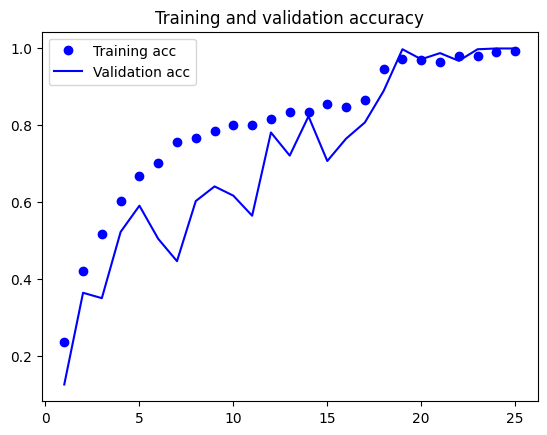

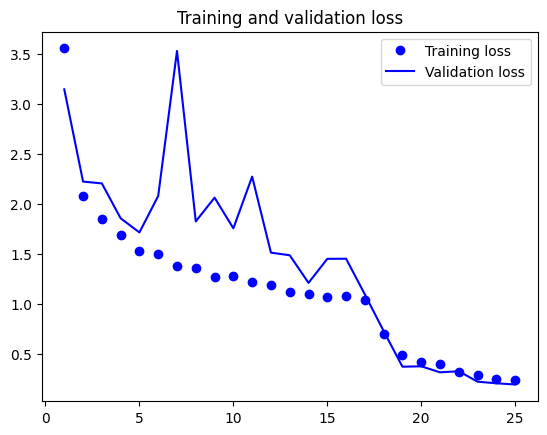

In [ ]:


#To można dla resnetu dwa rozne LR ->
#optimizer1 = tf.keras.optimizers.Adam(learning_rate={'conv_layers': 0.001, 'dense_layers': 0.01})
#model_CNN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model_CNN.compile(optimizer=Adam(learning_rate=0.005),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

EarlyStop_CNN=tf.keras.callbacks.EarlyStopping( monitor="val_accuracy",patience=7,verbose=1,mode="max",restore_best_weights=True)
ReduceLR_CNN = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.2,patience=3,verbose=1,mode="max",min_lr=0.0001)

history_cnn = model_CNN.fit(ds['train_X'], ds['train_classes'], validation_split=0.125, epochs=25 ,batch_size=16,callbacks=[EarlyStop_CNN,ReduceLR_CNN])

#plt.plot(history_cnn.history['accuracy'], label='accuracy')
#plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')

#plt.legend(loc='lower right')

#test_loss, test_acc = model_CNN.evaluate(ds['train_X'], ds['train_classes'], verbose=2)

training_plot(history_cnn)

16/16 [==============================] - 1s 49ms/step - loss: 0.2010 - accuracy: 0.9960
Test accuracy: 0.9959999918937683
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


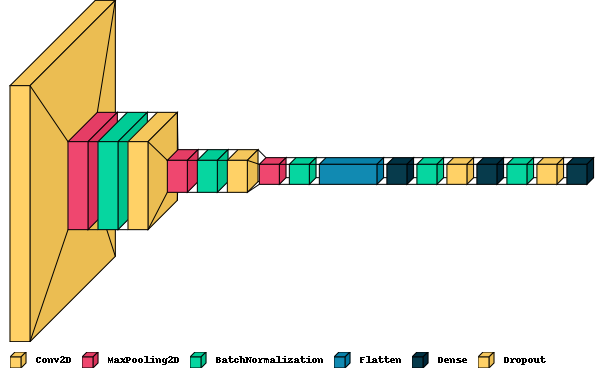

In [ ]:
loss, accuracy = model_CNN.evaluate(ds['test_X'], ds['test_classes'])
print('Test accuracy:', accuracy)

dot_img_file = './model_CNN1.png'
tf.keras.utils.plot_model(model_CNN, to_file=dot_img_file, show_shapes=True,show_layer_activations=True)
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model_CNN,legend=True)

16/16 [==============================] - 1s 55ms/step


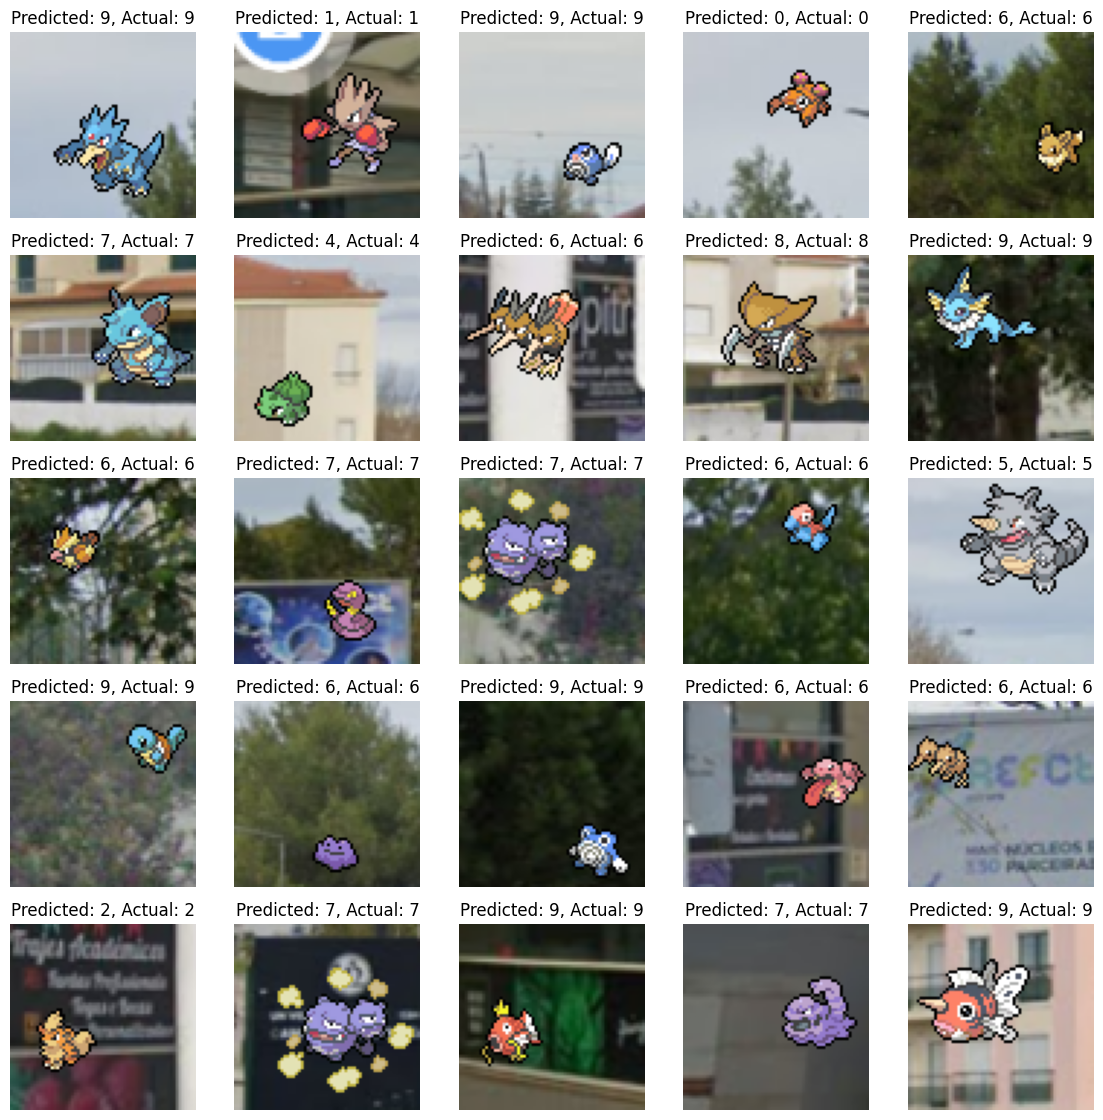

In [ ]:
#Chat gpt func
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(model, X_test, y_test):
    # Get model predictions for test images
    y_pred = model.predict(X_test)
    
    # Convert one-hot encoded labels to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Create a 5x5 grid of random test images and their predicted and true labels
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(14,14))
    for i, ax in enumerate(axes.flat):
        # Generate a random index for a test image
        idx = np.random.randint(len(X_test))
        
        # Display the test image and its predicted and true labels
        ax.imshow(X_test[idx])
        ax.set_title(f"Predicted: {y_pred_classes[idx]}, Actual: {y_test_classes[idx]}")
        ax.axis('off')
        
    plt.show()
plot_predictions(model_CNN,ds['test_X'], ds['test_classes'])


In [ ]:
#3 Multilabel classificaition loss='binary crossentropy'
#Output layer activation 'sigmoid' 
#Y = labels 
#
model_3 = models.Sequential()
#model_3.add(layers.Normalization(input_shape=(64, 64, 3)))

model_3.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal(),input_shape=(64, 64, 3)))
model_3.add(layers.MaxPooling2D(pool_size=(3, 3),padding='same'))
model_3.add(layers.BatchNormalization())
#model_3.add(layers.Dropout(0.2))



model_3.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=tf.keras.regularizers.L2(0.009)))
model_3.add(layers.MaxPooling2D(pool_size=(3, 3),padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.2))



model_3.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()))
model_3.add(layers.MaxPooling2D(pool_size=(3, 3),padding='same'))
model_3.add(layers.BatchNormalization())



In [ ]:
model_3.add(layers.Flatten())
model_3.add(layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.008)))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.2))

model_3.add(layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.007)))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(10,activation='sigmoid'))


Epoch 1/25
219/219 [==============================] - 34s 147ms/step - loss: 1.1102 - accuracy: 0.1771 - val_loss: 0.5358 - val_accuracy: 0.0840 - lr: 0.0030
Epoch 2/25
219/219 [==============================] - 32s 147ms/step - loss: 0.4419 - accuracy: 0.2409 - val_loss: 0.4910 - val_accuracy: 0.0840 - lr: 0.0030
Epoch 3/25
219/219 [==============================] - 34s 157ms/step - loss: 0.4175 - accuracy: 0.2694 - val_loss: 0.5881 - val_accuracy: 0.1340 - lr: 0.0030
Epoch 4/25
219/219 [==============================] - 31s 143ms/step - loss: 0.3989 - accuracy: 0.3309 - val_loss: 0.4701 - val_accuracy: 0.2240 - lr: 0.0030
Epoch 5/25
219/219 [==============================] - 31s 142ms/step - loss: 0.3890 - accuracy: 0.3620 - val_loss: 0.4295 - val_accuracy: 0.2280 - lr: 0.0030
Epoch 6/25
219/219 [==============================] - 31s 144ms/step - loss: 0.3745 - accuracy: 0.3906 - val_loss: 0.4230 - val_accuracy: 0.3540 - lr: 0.0030
Epoch 7/25
219/219 [==============================] 

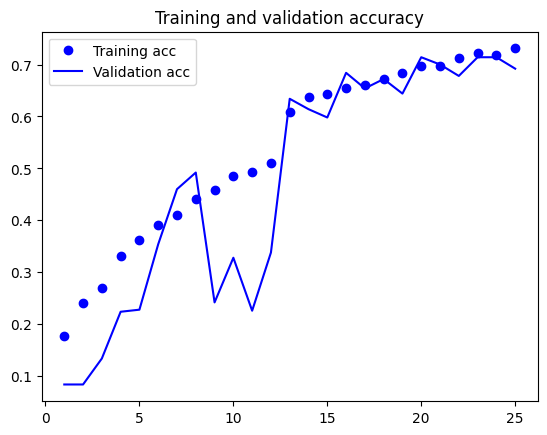

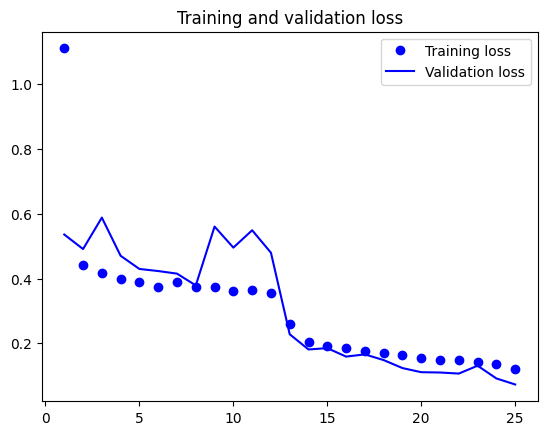

In [ ]:
model_3.compile(optimizer=Adam(learning_rate=0.003),loss='binary_crossentropy',metrics=['accuracy'])

EarlyStop=tf.keras.callbacks.EarlyStopping( monitor="val_accuracy",patience=10,verbose=1,mode="max",restore_best_weights=True)
ReduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.2,patience=4,verbose=1,mode="max",min_lr=0.0001)

history_3 = model_3.fit(ds['train_X'], ds['train_labels'], validation_split=0.125, epochs=25 ,batch_size=16,callbacks=[EarlyStop,ReduceLR])
training_plot(history_3)